# 4 | Naive Bayesian Classification

1. Gussian Naive Bayes
2. Multinomial Naive Bayes

## Importing libraries

In [1]:
from sklearn.datasets import load_iris                                 #iris dataset in sklearn
from sklearn.datasets import fetch_20newsgroups                        #news groups dataset
from sklearn.model_selection import train_test_split                   #splitting train-test data
from sklearn.feature_extraction.text import TfidfVectorizer            #Tfidf
from sklearn.naive_bayes import GaussianNB                             #Gaussian naive bayes 
from sklearn.naive_bayes import MultinomialNB                          #Multinomial naive bayes
from sklearn.pipeline import make_pipeline                             #pipeline
from sklearn.metrics import confusion_matrix                           #accuracy
import seaborn as sns                                                  #visualizing
import matplotlib.pyplot as plt                                        #visualizing

## GaussianNB

In [2]:
#gaussiannb classifier
x,y=load_iris(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
gnb=GaussianNB()
y_pred=gnb.fit(x_train,y_train).predict(x_test)

In [3]:
print("Number of mislabled points")
x_test.shape[0],y_test!=y_pred.sum()

Number of mislabled points


(38, array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]))

## MultinomialNB

In [4]:
data = fetch_20newsgroups()
data.target_names                                                      #data stores actual data & target stores attribute names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
train = fetch_20newsgroups(subset = 'train')
test = fetch_20newsgroups(subset = 'test')

In [6]:
train.data[5]

'From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\nSubject: Re: Rewording the Second Amendment (ideas)\nOrganization: VTT\nLines: 58\n\nIn article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:\n>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:\n>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:\n>\n>> >> The massive destructive power of many modern weapons, makes the\n>> >> cost of an accidental or crimial usage of these weapons to great.\n>> >> The weapons of mass destruction need to be in the control of\n>> >> the government only.  Individual access would result in the\n>> >> needless deaths of millions.  This makes the right of the people\n>> >> to keep and bear many modern weapons non-existant.\n\n>> >Thanks for stating where you\'re coming from.  Needless to s

In [7]:
model=make_pipeline(TfidfVectorizer(), MultinomialNB())                  # output of 1st to 2nd

In [8]:
model.fit(train.data,train.target)
labels=model.predict(test.data)

In [9]:
#predict_category('harddisk and CD ROM')
pred = model.predict(['Hello the CD ROM is compact'])

In [10]:
pred

array([3])

In [11]:
train.target_names[pred[0]]

'comp.sys.ibm.pc.hardware'

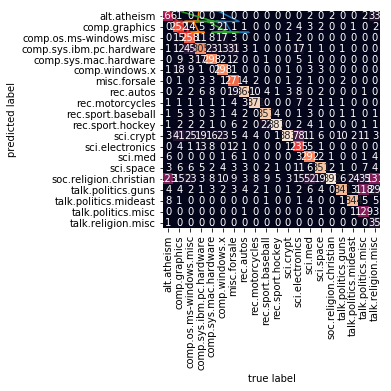

In [12]:
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=train.target_names,
            yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.plot(x,y)